## PD Controller

# PD Controller

In [1]:
class PDController:
  def __init__(self, Kp, Kd):
    self.Kp = Kp
    self.Kd = Kd

    self.previous_error = 0

  def pd_controller(self, error):
    #TODO: compute control output given error
    derivative = error - self.previous_error# TODO

    u = self.Kp * error + self.Kd * derivative # TODO self.k * error + kd * deriv * ki * integral

    self.previous_error = error
    return u

In [2]:
!git clone https://github.com/USC-ACTLab/1952zCS.git
%cd /content/1952zCS/
!git checkout lab4
%env CSW_PYTHON=python3
!pip install numpy matplotlib ipympl vispy pyyaml swig sphinx pyqt5 pytest scipy
!./buildSimOnly.sh
%cd /content/1952zCS/ros_ws/src/crazyswarm/scripts/
%load_ext autoreload
%autoreload 2

Cloning into '1952zCS'...
remote: Enumerating objects: 3695, done.
remote: Total 3695 (delta 0), reused 0 (delta 0), pack-reused 3695 (from 1)
Receiving objects: 100% (3695/3695), 4.51 MiB | 8.00 MiB/s, done.
Resolving deltas: 100% (2056/2056), done.
/content/1952zCS
Branch 'lab4' set up to track remote branch 'lab4' from 'origin'.
Switched to a new branch 'lab4'
env: CSW_PYTHON=python3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.5/270.5 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.9 M

# Tools to simulate ROS commands

Overly simplistic methods to simulate wand_follower and wand_orbiter nodes. Nothing to modify, just needed for simulation purposes

In [3]:

class Node:
  def __init__(self, name):
    self.name = name
    self.subscribers = {}

  def create_subscription(self, msg_type, topic_name, callback_fn, queue):
    self.subscribers[topic_name] = callback_fn

  def create_timer(self, rate, callback_fn):
    self.timer_callback = callback_fn
    self.rate = rate

class TFMessage:
  pass

class Transform:
  pass

class Joy:
  pass

class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

def run_follower(node):
    for i in range(10000):
      if i % int(1/node.rate) == 0:
        node.timer_callback()

      if i % 5 == 0:
        x, y, z = np.sin(i/(500*np.pi)), 0.5*np.cos(i/(500*np.pi)), 0.5*np.sin(i/(500*np.pi))+1
        transforms = dotdict({'transforms': [dotdict({'child_frame_id': 'wand', 'transform': dotdict({'translation': dotdict({'x': x, 'y': y, "z": z}), 'rotation': dotdict({'w': 1, 'x': 0, 'y': 0, 'z': 0})})})]})
        node.subscribers['tf'](transforms)

def run_orbiter(node):
    for i in range(10000):
      if i % int(1/node.rate) == 0:
        node.timer_callback()

      if i % 5 == 0:
        x, y, z = np.sin(i/(500*np.pi)), 0.5*np.cos(i/(500*np.pi)), 0.5*np.sin(i/(500*np.pi))+1
        transforms = dotdict({'transforms': [dotdict({'child_frame_id': 'wand', 'transform': dotdict({'translation': dotdict({'x': x, 'y': y, "z": z}), 'rotation': dotdict({'w': 1, 'x': 0, 'y': 0, 'z': 0})})})]})
        node.subscribers['tf'](transforms)

class rclpy_sim:

  def spin(node):
    if node.name == 'wand_follower_node':
      run_follower(node)
    elif node.name == 'wand_orbiter_node':
      run_orbiter(node)
    else:
      print('node {} not implemented'.format(node.name))

# Wand Follower

Moving to position: [ 61. 329.   1.]
Moving to position: [ 63. 329.   1.]
Moving to position: [ 63. 329.   1.]
Moving to position: [ 65. 329.   1.]
Moving to position: [ 65. 329.   1.]
Moving to position: [ 70. 328.   1.]
Moving to position: [ 70. 328.   1.]
Moving to position: [ 77. 325.   1.]
Moving to position: [ 77. 325.   1.]
Moving to position: [ 90. 318.   1.]
Moving to position: [ 90. 318.   1.]
Moving to position: [102. 308.   1.]
Moving to position: [102. 308.   1.]
Moving to position: [114. 295.   1.]
Moving to position: [114. 295.   1.]
Moving to position: [126. 280.   1.]
Moving to position: [126. 280.   1.]
Moving to position: [136. 262.   1.]
Moving to position: [136. 262.   1.]
Moving to position: [146. 244.   1.]
Moving to position: [146. 244.   1.]
Moving to position: [154. 227.   1.]
Moving to position: [154. 227.   1.]
Moving to position: [159. 213.   1.]
Moving to position: [159. 213.   1.]
Moving to position: [163. 203.   1.]
Moving to position: [163. 203.   1.]
M

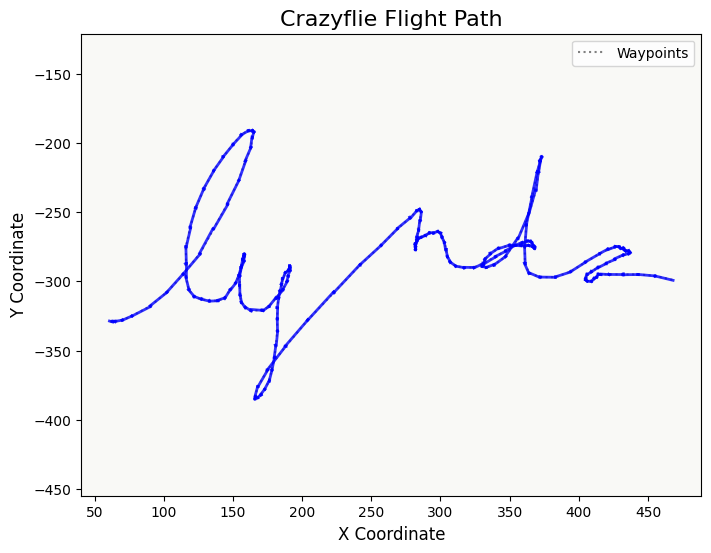

In [4]:
import numpy as np
import csv
from types import SimpleNamespace
import matplotlib.pyplot as plt


class WandFollower:
    def __init__(self, groupState, timeHelper, sim=True):
        """
        Initialize the WandFollower instance.
        Args:
          groupState: A namespace containing Crazyflie state and time helper.
          timeHelper: An instance of the Crazyflie time helper.
          sim: Whether this is a simulation environment.
        """
        self.groupState = groupState
        self.timeHelper = timeHelper
        self.sim = sim
        self.Hz = 10  # Default frequency
        self.wand_pose = None
        self.states = []  # Track states for visualization

    def timer_cb(self):
        """
        Simulate flight updates. In a real setup, this would send commands to the drone.
        """
        if self.wand_pose:
            position, _ = self.wand_pose
            self.states.append(position.tolist())  # Store the current position for visualization
            print(f"Moving to position: {position}")


def load_coordinates_from_csv(file_path):
    """
    Load coordinates from a CSV file and convert them to waypoints.
    Args:
      file_path (str): Path to the CSV file.
    Returns:
      List[Tuple[float, float, float]]: List of 3D waypoints.
    """
    waypoints = []
    with open(file_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            start = [float(row['Start_X']), float(row['Start_Y']), 1.0]  # Z fixed at 1.0
            end = [float(row['End_X']), float(row['End_Y']), 1.0]  # Z fixed at 1.0
            waypoints.append(start)
            waypoints.append(end)
    return waypoints


def run_follower(wand_node, waypoints):
    """
    Run the Crazyflie follower based on preloaded waypoints.
    Args:
      wand_node: The wand follower instance.
      waypoints: List of 3D waypoints.
    """
    for waypoint in waypoints:
        wand_node.wand_pose = (np.array(waypoint), [0, 0, 0, 1])  # Set new goal position
        wand_node.timer_cb()  # Trigger the update manually
        wand_node.timeHelper.sleepForRate(wand_node.Hz)  # Ensure consistent timing


def plot_flight_path_drawing(waypoints, flight_path):
    """
    Plot the flight path in a drawing-like style.

    Args:
      waypoints: List of waypoint coordinates [(x, y, z), ...].
      flight_path: List of Crazyflie's actual flight path [(x, y, z), ...].
    """
    # Extract X, Y for waypoints and flight path, and invert Y-axis
    waypoint_x = [wp[0] for wp in waypoints]
    waypoint_y = [-wp[1] for wp in waypoints]  # Invert Y-axis for waypoints

    flight_x = [fp[0] for fp in flight_path]
    flight_y = [-fp[1] for fp in flight_path]  # Invert Y-axis for flight path

    plt.figure(figsize=(8, 6))

    # Plot the waypoints with dotted lines
    plt.plot(waypoint_x, waypoint_y, linestyle=':', color='gray', label='Waypoints', linewidth=1.5)

    # plotting flight path
    for i in range(len(flight_x) - 1):
        jitter_x = np.random.normal(0, 0.2, len(flight_x))
        jitter_y = np.random.normal(0, 0.2, len(flight_y))
        plt.plot(
            [flight_x[i] + jitter_x[i], flight_x[i + 1] + jitter_x[i + 1]],
            [flight_y[i] + jitter_y[i], flight_y[i + 1] + jitter_y[i + 1]],
            color='blue',
            linewidth=2,
            alpha=0.8
        )

    plt.title('Crazyflie Flight Path', fontsize=16)
    plt.xlabel('X Coordinate', fontsize=12)
    plt.ylabel('Y Coordinate', fontsize=12)
    plt.legend(fontsize=10)
    plt.axis('equal')
    plt.gca().set_facecolor('#f9f9f6')
    plt.show()


def main():
    sim = True
    if sim:
        from pycrazyswarm import Crazyswarm
        rclpy_sim = None
        swarm = Crazyswarm(args='--vis=null --sim')
        crazyflies = swarm.allcfs.crazyflies
        timeHelper = swarm.timeHelper

        groupState = SimpleNamespace(crazyflies=crazyflies, timeHelper=timeHelper)
    else:
        from tf2_msgs.msg import TFMessage
        from rclpy.node import Node
        import rclpy
        from crazyflie_py import Crazyswarm
        from sensor_msgs.msg import Joy
        swarm = Crazyswarm()
        crazyflies = swarm.allcfs.crazyflies
        timeHelper = swarm.timeHelper

        groupState = SimpleNamespace(crazyflies=crazyflies, timeHelper=timeHelper)

    # Loading wand coordinates from  CSV
    csv_file_path = "/content/drawing_coordinates.csv"  # Path to your CSV file
    wand_coordinates = load_coordinates_from_csv(csv_file_path)

    wand_node = WandFollower(groupState, timeHelper, sim=sim)
    wand_node.Hz = 10  # Adjust the update frequency if needed

    # Simulation
    run_follower(wand_node, wand_coordinates)
    # plot
    plot_flight_path_drawing(wand_coordinates, wand_node.states)


if __name__ == "__main__":
    main()